<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Выявление-закономерностей" data-toc-modified-id="Выявление-закономерностей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выявление закономерностей</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li><li><span><a href="#Использование-моделей-LR,-CBR,-LGBMRegressor" data-toc-modified-id="Использование-моделей-LR,-CBR,-LGBMRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Использование моделей LR, CBR, LGBMRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Катбустрегрессия" data-toc-modified-id="Катбустрегрессия-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Катбустрегрессия</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
# импортирую библиотеку pandas как главного инструмента для анализа структурных данных и временных рядов
import pandas as pd
from pandas.util.testing import assert_frame_equal
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib для работы с двумерными графиками
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
# выберу стиль для plt инструментов
plt.style.use('ggplot')
# импортирую библиотеку scipy для выполнения математических, научных и инженерных расчётов
from scipy import stats as st
# импортирую библиотеку для работы со временем
from datetime import datetime
# импортирую библиотеку для работы с массивами данных. NumPy - основополагающая библиотека, необходимая для научных вычислений
import numpy as np
# импортирую библиотеку и инструменты Scikit-learn - интегратора классических алгоритмов машинного обучения
# алгоритм классификации дерева решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# алгоритм классификации случайный лес
from sklearn.ensemble import RandomForestClassifier
# алгоритм классификации логическая регрессия
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score

/tmp/ipykernel_264/677273773.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# рассмотрим первые пять строк во фрейме данных в переменной df
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
# рассмотрим последние 10 строк во фрейме данных в переменной df
df.tail(10)

,num_orders
datetime,
2018-08-31 22:20:00,48
2018-08-31 22:30:00,41
2018-08-31 22:40:00,34
2018-08-31 22:50:00,34
2018-08-31 23:00:00,30
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39


*В ходе первичного осмотра недостатки в датасете не установлены. Вместе с тем необходимо дополнительно:*
-  проверить наличие значений NaN (отсутствующее в ячейке число) и значений None (нечисловой тип 'NoneType');
- провести проверку всего датасета на наличие дубликатов.

In [5]:
# получим общую информацию о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


*Для наглядности и удобства рассмотрения данных в датасете опишем из условия проекта основные признаки:*  

**Признаки:**
- datetime - дата, время;
- num_orders - количество заказов.

*Более детальное рассмотрение данных перед их предообработкой сообщают нам следующее:* 
1. в рамках проекта проводится исследование над датасетом состоящим из 2 столбцов (фичи, признаки) и 26496 строк;
2. для организации анализа данных с учетом того, что у нас временные ряды с регрессией, столбец datetime  необходимо привести в тип данных datatime.

In [6]:
 # проведем на всякий случай подсчёт пропусков
(df.isna().sum())

num_orders    0
dtype: int64

In [7]:
# итогом количество 'NaN'  в дата фрейме
print('NaN occurrences in DataFrame:', df.isna().sum().sum())

NaN occurrences in DataFrame: 0


*С учетом предварительной предообработки фрейма данных внесем изменение типа данных Datetime с object на datetime64.*

In [8]:
# изменение типа данных Datetime с object на datetime64
#df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)

In [9]:
# убедимся, что все получилось
#df['datetime'].dtype

**Вывод:** 
*Первичный осмотр данных проведен, фрейм данных готов к следующему этапу - анализу* 

## Анализ

*Согласно инструкции необходимо загрузить данные и выполнить их ресемплирование по одному часу.*

In [10]:
# для начала установим индекс таблицы равным столбцу datetime
df = df.sort_index()

In [11]:
# проверим, в хронологическом ли порядке расположены даты и время
df.index.is_monotonic

True

In [12]:
# посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


**Вывод:** с помощью метода is_monotonic получен положительный ответ о том, что даты и время расположены в хронологическом порядке.  

### Выявление закономерностей

*На этапе рассмотрения данных можно построить гипотетизу, что датасет содержит данные в периоде: 1 марта 2018 - 31 августа 2018, то есть за полгода. Одновременно в ходе наблюдения можно обраттить внимание на интервал заказов по датам, через каждые 10 мин. Можно сделать тривиальный вывод, что поскольку в 1 час - 60 мин, выходит, что 1 день (24 часа) включает в себя 144 показателя (интервала времени).*      

In [13]:
# проведем ресемплирование данных
df.sort_index(inplace=True)

In [14]:
df_mean = df.resample('1H').mean()

<AxesSubplot:xlabel='datetime'>

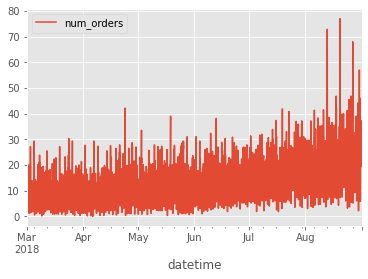

In [15]:
# построим график среднего количества заказов такси по месяцам
df_mean.plot()

In [16]:
# построим график суммарного количества заказов такси по месяцам
df_sum = df.resample('1H').sum()

<AxesSubplot:xlabel='datetime'>

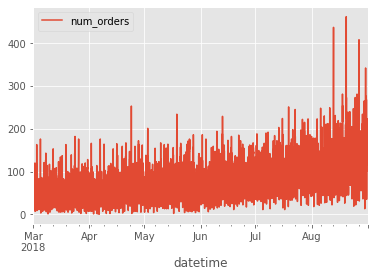

In [17]:
df_sum.plot()

**Вывод:** *И значения средних показателей заказов такси и значения суммарных показатлей показывают постепенное увеличение с марта по август месяцы, то есть положительный тренд.*

In [18]:
# чтобы во временном ряду снизить колебания, применим скользящее среднее
df_mean['rolling_mean'] = df_mean.rolling(10).mean()

<AxesSubplot:xlabel='datetime'>

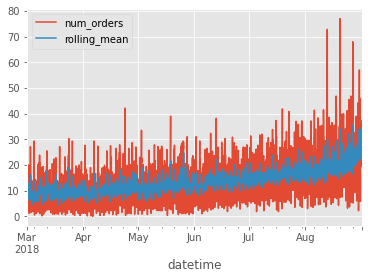

In [19]:
df_mean.plot()

*Скользящее среднее на графике еще раз подтверждает, что количество заказов с начала весны постепенно ежемесячно увеличивается, то есть наблюдается положительный тренд* 

In [20]:
# построим график тренда за рассматриваемый период
# разложим временной ряд на тренд
decomposed = seasonal_decompose(df_sum)

<AxesSubplot:xlabel='datetime'>

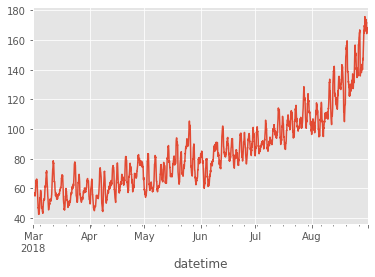

In [21]:
# нарисуем график
decomposed.trend.plot(ax=plt.gca())

*Мы можем заметить, что временной ряд на графике имеет не стационарный ряд, потому что у него меняется среднее значение* 

In [22]:
# найдём скользящее стандартное отклонение 
df_mean['std'] = df_mean['num_orders'].rolling(15).std()

<AxesSubplot:xlabel='datetime'>

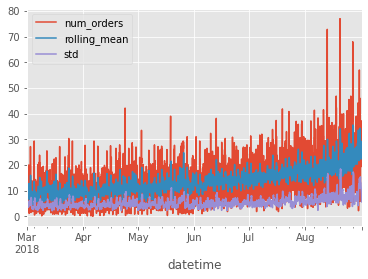

In [23]:
df_mean.plot() 

*Можем обратить внимание, что меняется стандартное отклонение, что подверждает, что у нас не стационарный ряд с положительным трендом std*

<AxesSubplot:xlabel='datetime'>

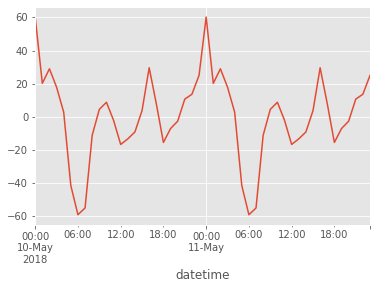

In [24]:
# посмотрим на вопрос сезонности в середине мая месяца
decomposed.seasonal['2018-05-10':'2018-05-11'].plot(ax=plt.gca())

*в части сезонности можем обратить внимание, что количество заказов такси в течение одного дня имеет пик значения в 12 час. ночи, минимальное значение под раннее утро, ближе к 6 утра*

## Обучение

### Подготовка данных к обучению

In [26]:
def make_features(df, max_lag, rolling_mean_size):
    df['dayofweek'] = df.index.dayofweek
    df['weekend'] = df.index.dayofweek.isin([5,6])*1
    df['hours'] = df.index.hour
    # используем функцию shift для определения разницы значений временного ряда
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
    # определим скользящее среднее
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

In [27]:
# применим функцию к фрейму данных в ресемплинге
make_features(df_sum, 24, 3)

In [28]:
# посмотрим на первые пять строк
df_sum.head()

,num_orders,dayofweek,weekend,hours,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,0,1,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,0,2,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,0,3,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.333333
2018-03-01 04:00:00,43,3,0,4,66.0,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


*Во фрейме данных появились NaN значения, полагаю целесообразным для релевантности исследования их удалить*

In [29]:
df_sum = df_sum.dropna()

In [30]:
# по исходным данным создадим обучающую (train) и тестовую (test) выборки
# по инструкции на тест выборку отводим 10% от исходных данных
train, test = train_test_split(df_sum, shuffle=False, test_size=0.1)

In [31]:
# проверим корректность деления
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-08-13 15:00:00
2018-08-13 16:00:00 2018-08-31 23:00:00


*Все получилось, продолжаем обучение*

In [32]:
# создаем фичи обучающие и целевые
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

In [33]:
# создаем тестовые фичи
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [34]:
# для поика значений RMSE подготовим функцию
def rmse (target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = mse ** 0.5
    return rmse

### Использование моделей LR, CBR, LGBMRegressor

*Согласно инструкции необходимо провести обучение разных моделей с различными гиперпараметрами*

**Традиционно, начнем с Линейной регрессии**

In [35]:
lr_model = LinearRegression()
lr_model.fit(features_train, target_train)
predicted_lr = pd.Series(lr_model.predict(features_test))

**Построим модель CatBoostRegressor**

In [36]:
#построим модель CBR с различными значениями гиперпараметра iterations с помощью кросс-валидации
for iteration in range(75, 151, 25):
    cat_model = CatBoostRegressor(loss_function="RMSE", iterations=iteration, depth=6, verbose=10)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=3)
    print("Score при iterations =", iteration, ":", cat_cv)
    print("Score mean =", sum(cat_cv)/len(cat_cv))
    print()

Learning rate set to 0.391933
0:	learn: 33.5540354	total: 53.9ms	remaining: 3.99s
10:	learn: 23.5314237	total: 105ms	remaining: 614ms
20:	learn: 21.3531520	total: 156ms	remaining: 400ms
30:	learn: 19.2519005	total: 208ms	remaining: 295ms
40:	learn: 17.4664927	total: 260ms	remaining: 216ms
50:	learn: 16.0628417	total: 310ms	remaining: 146ms
60:	learn: 14.7816145	total: 386ms	remaining: 88.6ms
70:	learn: 13.7444025	total: 467ms	remaining: 26.3ms
74:	learn: 13.5967356	total: 498ms	remaining: 0us
Learning rate set to 0.391957
0:	learn: 33.7026520	total: 6ms	remaining: 444ms
10:	learn: 23.1472657	total: 57.4ms	remaining: 334ms
20:	learn: 21.2402598	total: 108ms	remaining: 277ms
30:	learn: 18.8706489	total: 175ms	remaining: 248ms
40:	learn: 17.0844891	total: 256ms	remaining: 212ms
50:	learn: 15.8284656	total: 336ms	remaining: 158ms
60:	learn: 14.7960773	total: 422ms	remaining: 96.9ms
70:	learn: 13.7348788	total: 508ms	remaining: 28.6ms
74:	learn: 13.3321178	total: 540ms	remaining: 0us
Learni

In [37]:
#исследуем работу модели с различными значениями гиперпараметра depth
for depth in range(1, 10, 2):
    cat_model = CatBoostRegressor(loss_function="RMSE", iterations=150, depth=depth, verbose=10)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=3)
    print("Score при depth =", depth, ":", cat_cv)
    print("Score mean =", sum(cat_cv)/len(cat_cv))
    print()

Learning rate set to 0.223087
0:	learn: 37.0978295	total: 1.01ms	remaining: 150ms
10:	learn: 29.9616490	total: 8.86ms	remaining: 112ms
20:	learn: 28.1192433	total: 16.9ms	remaining: 104ms
30:	learn: 27.1924064	total: 24.8ms	remaining: 95.4ms
40:	learn: 26.6230634	total: 33.3ms	remaining: 88.4ms
50:	learn: 26.2219454	total: 41ms	remaining: 79.6ms
60:	learn: 25.9134187	total: 49.4ms	remaining: 72.1ms
70:	learn: 25.6583831	total: 58.8ms	remaining: 65.4ms
80:	learn: 25.4457370	total: 69.4ms	remaining: 59.1ms
90:	learn: 25.2663187	total: 79.9ms	remaining: 51.8ms
100:	learn: 25.1261173	total: 91ms	remaining: 44.2ms
110:	learn: 25.0196101	total: 102ms	remaining: 35.9ms
120:	learn: 24.8965120	total: 111ms	remaining: 26.7ms
130:	learn: 24.7835828	total: 121ms	remaining: 17.5ms
140:	learn: 24.6972071	total: 130ms	remaining: 8.3ms
149:	learn: 24.5989200	total: 138ms	remaining: 0us
Learning rate set to 0.223101
0:	learn: 38.1550117	total: 920us	remaining: 137ms
10:	learn: 29.3293411	total: 9.6ms	r

*В значении score mean при depth = 7 получился наилучший результат, его возьмем за основу*

In [38]:
# создаем модель cbr_100_7
cbr_100_7 = CatBoostRegressor(loss_function="RMSE", iterations=100, depth=7, verbose=10)
cbr_100_7.fit(features_train, target_train)
predicted_cat = pd.Series(cbr_100_7.predict(features_test))

Learning rate set to 0.330732
0:	learn: 33.5213168	total: 14.3ms	remaining: 1.42s
10:	learn: 22.4468440	total: 123ms	remaining: 998ms
20:	learn: 20.8324221	total: 287ms	remaining: 1.08s
30:	learn: 19.0820121	total: 449ms	remaining: 1000ms
40:	learn: 17.5855114	total: 615ms	remaining: 885ms
50:	learn: 16.1950470	total: 771ms	remaining: 741ms
60:	learn: 15.1771325	total: 894ms	remaining: 571ms
70:	learn: 14.0923300	total: 991ms	remaining: 405ms
80:	learn: 13.4467070	total: 1.09s	remaining: 256ms
90:	learn: 12.8926961	total: 1.19s	remaining: 118ms
99:	learn: 12.3845189	total: 1.27s	remaining: 0us


**Построим модель - LGBMRegressor**

In [39]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0
}

In [40]:
lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(features_train, target_train)
predictions_lgbm = lgbm_model.predict(features_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.200876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

## Тестирование

### Линейная регрессия

In [41]:
rmse(target_test, predicted_lr)

45.16735569131763

###  Катбустрегрессия

In [42]:
rmse(target_test, predicted_cat)

40.2801158019238

### LGBMRegressor

In [43]:
rmse(target_test, predictions_lgbm)

40.74573294596496

**Вывод:** 
*Согласно условиям инструкции значение метрики RMSE на тестовой выборке должно быть не больше 48, во всех представленных моделях показатель RMSE ниже 48. При этом будучи DS в компании «Чётенькое такси» мной рекомендована была бы к использованию модель катбустрегрессию, поскольку значение RMSE самое низкое из трех представленных* 

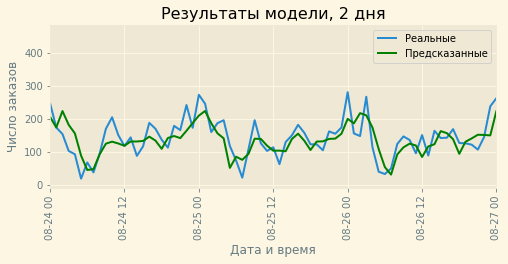

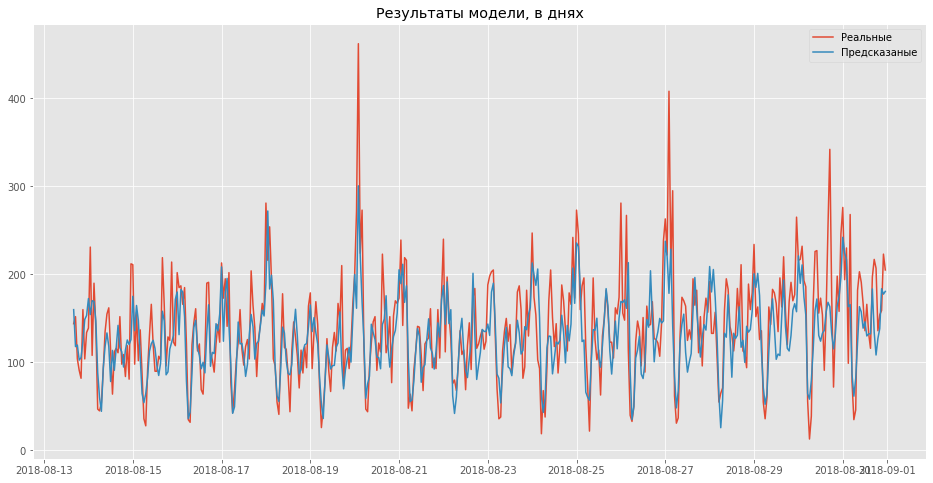

In [51]:
# используем лучшую модель, полученную в ходе сравнения катбустрегрессию
plt.figure(figsize=(16, 8))

plt.plot(target_test, label='Реальные')
plt.plot(target_test.index, predicted_cat, label='Предсказаные')

plt.title('Результаты модели, в днях')
plt.legend()
plt.show()

*Анализируя модель прогнозирования, можно отметить, что она близка к реальным значениям, следовательно вероятность точного прогноза высокая*